# Practical 2
Name:-Srushti Rajesh Tatte
Div:-C   Roll No:-13353
Batch-C3
Date:- 05-02-2024

Enter the size of the puzzle (e.g., 3 for 8-puzzle): 3
Enter the initial state row-wise (0 represents the empty tile):
1 2 3
4 0 5 
6 7 8
Solution found!
Step 0:
1 2 3
4 0 5
6 7 8

Step 1:
1 2 3
4 5 0
6 7 8

Step 2:
1 2 3
4 5 8
6 7 0

Step 3:
1 2 3
4 5 8
6 0 7

Step 4:
1 2 3
4 5 8
0 6 7

Step 5:
1 2 3
0 5 8
4 6 7

Step 6:
1 2 3
5 0 8
4 6 7

Step 7:
1 2 3
5 6 8
4 0 7

Step 8:
1 2 3
5 6 8
4 7 0

Step 9:
1 2 3
5 6 0
4 7 8

Step 10:
1 2 3
5 0 6
4 7 8

Step 11:
1 2 3
0 5 6
4 7 8

Step 12:
1 2 3
4 5 6
0 7 8

Step 13:
1 2 3
4 5 6
7 0 8

Step 14:
1 2 3
4 5 6
7 8 0



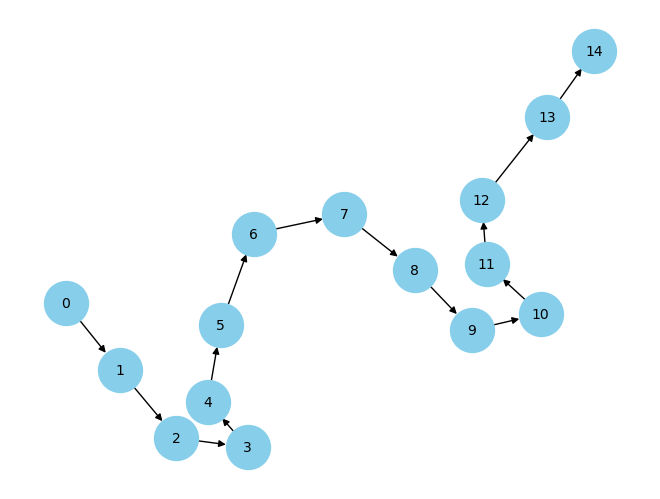

In [2]:
#Import necessary libraries: heapq for the priority queue, 
#networkx for graph representation, and matplotlib for plotting.
import heapq
import networkx as nx
import matplotlib.pyplot as plt

#class PuzzleNode to represent a state in the puzzle. 
#It includes the puzzle configuration, cost, depth, parent node, and heuristic value.
class PuzzleNode:
    def __init__(self, puzzle, cost, depth, parent):
        self.puzzle = puzzle
        self.cost = cost
        self.depth = depth
        self.parent = parent
        self.heuristic = self.calculate_heuristic()

#heuristic function to calculate the Manhattan distance for each tile        
    def calculate_heuristic(self):
        # Initialize heuristic value to 0
        h = 0
        # Get the size of the puzzle (assuming it's a square puzzle)
        n = len(self.puzzle)
        # Loop through each cell of the puzzle
        for i in range(n):
            for j in range(n):
                # Check if the cell is not empty (contains a number)
                if self.puzzle[i][j] != 0:
                    # Calculate the target row and column for the current number
                    target_row = (self.puzzle[i][j] - 1) // n
                    target_col = (self.puzzle[i][j] - 1) % n
                # Calculate the Manhattan distance between the current cell and its target position
                # Manhattan distance is the sum of the absolute differences in the row and column indices
                    h += abs(i - target_row) + abs(j - target_col)
        # Return the total heuristic value
        return h
    
#Implement the less than comparison for PuzzleNode instances based on their total cost and heuristic.
    def __lt__(self, other):
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)

#Check if the current state is the goal state (solved puzzle).
    def is_goal_state(self):
        # Get the size of the puzzle (assuming it's a square puzzle)
        n = len(self.puzzle)
        # Initialize the value to check against to 1
        value = 1
        # Loop through each cell of the puzzle
        for i in range(n):
            for j in range(n):
                # Check if it's the last cell in the puzzle
                if i == n - 1 and j == n - 1:
                     # If it's the last cell, it should contain 0
                    if self.puzzle[i][j] != 0:
                        return False
                     # For all other cells
                    # Check if the cell contains the expected value
                elif self.puzzle[i][j] != value:
                    return False
                # Increment the value to check against for the next cell
                value += 1
            # If all cells have been checked and all values are correct, return True (goal state)
        return True
    
#Generate successor nodes by moving the empty tile in different directions.
    def generate_successors(self):
        # Initialize an empty list to store the successors
        successors = []
        # Get the size of the puzzle (assuming it's a square puzzle)
        n = len(self.puzzle)
        # Define the possible movements in terms of changes in row and column indices
        dx = [-1, 1, 0, 0] #Change in row for up, down, left, right movements
        dy = [0, 0, -1, 1] # Change in column for up, down, left, right movements

        # Loop through each cell of the puzzle
        for i in range(n):
            for j in range(n):
                 # Check if the current cell contains the empty space (0)
                if self.puzzle[i][j] == 0:
                    # Iterate over possible movements (up, down, left, right)
                    for k in range(4):
                         # Calculate the new position after the movement
                        ni, nj = i + dx[k], j + dy[k]
                        # Check if the new position is within the bounds of the puzzle
                        if 0 <= ni < n and 0 <= nj < n:
                            # Create a copy of the current puzzle state
                            new_puzzle = [row[:] for row in self.puzzle]
                            # Perform the movement by swapping the empty space with the adjacent tile
                            new_puzzle[i][j], new_puzzle[ni][nj] = new_puzzle[ni][nj], 0
                             # Create a new PuzzleNode representing the successor state
                            # Increment the cost and depth by 1 from the current state
                            successor = PuzzleNode(new_puzzle, self.cost + 1, self.depth + 1, self)
                            # Add the successor to the list of successors
                            successors.append(successor)
        # Return the list of successors
        return successors
    
#Print the solution steps by traversing the path from the goal state to the initial state.
    def print_solution(self):
        # Initialize an empty list to store the nodes along the solution path
        path = []
        # Start from the current node
        current = self
        # Trace back from the goal state to the initial state
        while current:
            # Add the current node to the solution path
            path.append(current)
            # Move to the parent node
            current = current.parent
        # Iterate through the solution path in reverse order
        for i, node in enumerate(reversed(path)):
           # Print the step number 
            print(f"Step {i}:")
             # Print the puzzle state of the current node
            node.print_puzzle()
            
#Print the puzzle configuration.
    def print_puzzle(self):
        # Iterate through each row in the puzzle
        for row in self.puzzle:
            # Print each element in the row separated by a space
            print(" ".join(map(str, row)))
            # Print an empty line for readability
        print()

#Implement the A* algorithm to solve the 8-puzzle problem using a priority queue.
def solve_eight_puzzle(initial_puzzle):
    initial_node = PuzzleNode(initial_puzzle, 0, 0, None)
    open_set = [initial_node]
    closed_set = set()

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.is_goal_state():
            print("Solution found!")
            current_node.print_solution()
            return current_node

        closed_set.add(tuple(map(tuple, current_node.puzzle)))

        successors = current_node.generate_successors()
        for successor in successors:
            if tuple(map(tuple, successor.puzzle)) not in closed_set and successor not in open_set:
                heapq.heappush(open_set, successor)

    print("No solution found!")
    return None

#Plot the solution steps as a graph using networkx and matplotlib.
def plot_solution(solution_node):
    G = nx.DiGraph()

    path = []
    current = solution_node
    while current:
        path.append(current)
        current = current.parent

    for i, node in enumerate(reversed(path)):
        G.add_node(i, label=f"Step {i}\nCost: {node.cost}\nHeuristic: {node.heuristic}\nDepth: {node.depth}")
        if node.parent:
            G.add_edge(i - 1, i)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'label')

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

#Get user input for the size of the puzzle and the initial state.
def get_user_input():
    n = int(input("Enter the size of the puzzle (e.g., 3 for 8-puzzle): "))
    print("Enter the initial state row-wise (0 represents the empty tile):")
    puzzle = [list(map(int, input().split())) for _ in range(n)]
    return puzzle

#Run the program by getting user input, solving the puzzle, and plotting the solution graph.
if __name__ == "__main__":
    initial_puzzle = get_user_input()
    solution_node = solve_eight_puzzle(initial_puzzle)

    if solution_node:
        plot_solution(solution_node)
